# Similarity Search

Cosine similarity is a technique from information retrieval. It helps us find documents that are similar to each other, for example, by giving the user the option to "show me more documents like this."

## Cosine Similarity

We start with a vector representation of our text data. This can be obtained using tokenization or embeddings, as discussed elsewhere in these notes. 

+ If the vectors are identical, then the angle is 0 degrees, and the cosine similarity is 1.
+ If the vectors are unrelated, the angle is 90 degrees, and the cosine similarity is 0.
+ If the vectors are in opposite directions, the angle is 180 degrees, and the cosine similarity is -1.

The cosine is a trigonometric function that, when applied to any vector, results in a metric that depends on the differences of direction in the vector and not on their magnitude. This is important because it allows us to compare documents of different lengths. 

![](img/02_cosine_similarity.png)

Image source: Cosine Similarity Explained ([Shivanandhan, 2025](https://medium.com/data-science-collective/cosine-similarity-explained-the-math-behind-llms-b20caac9f93c))

Given a corpus of documents, we can obtain their tf-idf similarity as before.

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documents = [
    "The machine learning model predicts customer behavior based on historical data.",
    "The machine learning model predicts user behavior using historical data.",
    "A machine learning model predicts customer behavior from past data.",
    "The predictive model uses historical customer data to forecast behavior.",
    "Customer behavior is predicted by a data-driven machine learning system.",
    "Historical data is analyzed to understand how customers behave.",
    "A data science model analyzes past information to make predictions.",
    "Business analysts study customer trends to support decision making.",
    "Statistical techniques are used to interpret large datasets.",
    "The weather forecast was inaccurate due to missing satellite data.",
    "A novel explores human relationships in a small coastal town."
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)
cosine_similarities = cosine_similarity(X)

We plot the results to illustrate a similarity search.

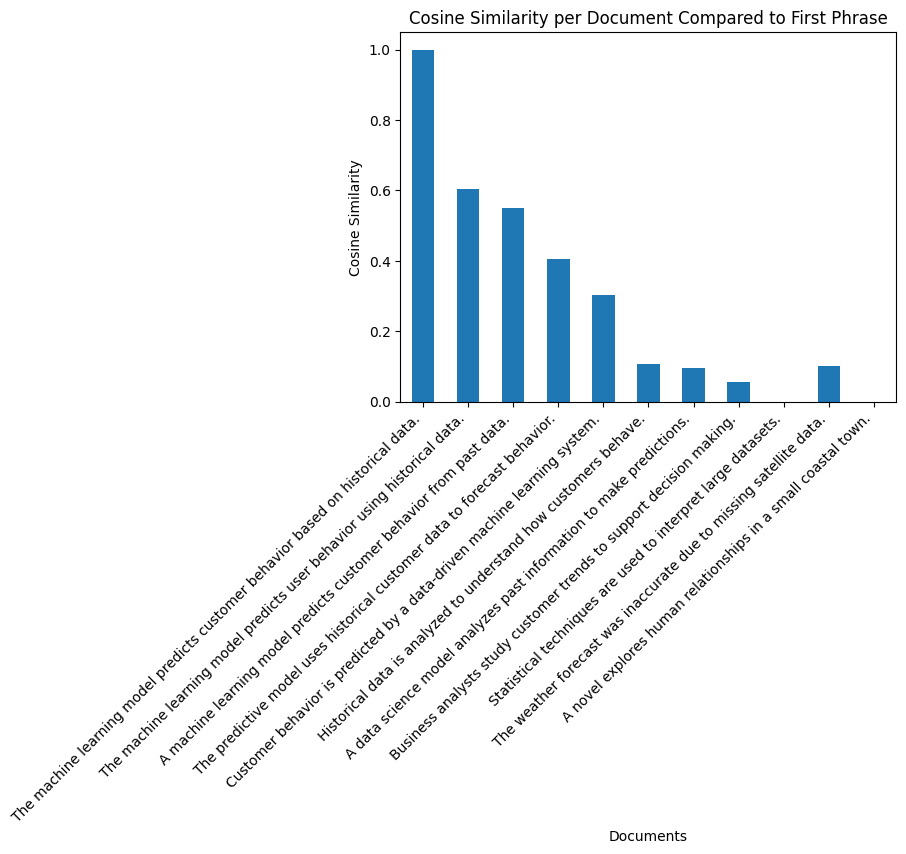

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

similarities_df = pd.DataFrame(cosine_similarities)
row = similarities_df.loc[0,:]

row.plot(kind='bar', 
         xlabel='Documents',
         ylabel='Cosine Similarity', 
         title='Cosine Similarity per Document Compared to First Phrase')

plt.xticks(range(len(documents)), documents, rotation=45, ha='right')
plt.show()

Perform a similarity search:

In [3]:
def most_similar(similarity_matrix, index):
    similarities = similarity_matrix[index].copy()
    similarities[index] = -1  # Exclude self
    return similarities.argmax()

In [4]:
most_similar(cosine_similarities, 0)

np.int64(1)

We have found texts that *look* similar. However, we may want to find texts that have *similar meaning*.